In [46]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from diffusers import MarigoldDepthPipeline
from PIL import Image
from transformers import pipeline

assert torch.cuda.is_available(), 'CUDA is not available'

In [47]:
sample_img_path = 'stuff/driver.jpg'

## Model comparison

### Marigold

In [151]:
MODEL = 'prs-eth/marigold-depth-v1-0'
pipe = MarigoldDepthPipeline.from_pretrained(MODEL, device=0)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Keyword arguments {'device': 0} are not expected by MarigoldDepthPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 5/5 [00:07<00:00,  1.60s/it]


In [129]:
image = Image.open(sample_img_path)
res_marigold = pipe(image)

Marigold predictions...: 100%|██████████| 1/1 [00:31<00:00, 31.44s/it]


In [146]:
img = np.array(res_marigold.prediction.data).squeeze()

(array([2.53749e+05, 3.58790e+04, 3.56710e+04, 1.02270e+04, 1.03000e+02,
        8.00000e+01, 1.12000e+02, 1.34000e+02, 1.57500e+03, 8.07000e+03]),
 array([0.00295136, 0.10250249, 0.20205362, 0.30160475, 0.40115589,
        0.50070703, 0.60025817, 0.69980925, 0.79936039, 0.89891154,
        0.99846268]),
 <BarContainer object of 10 artists>)

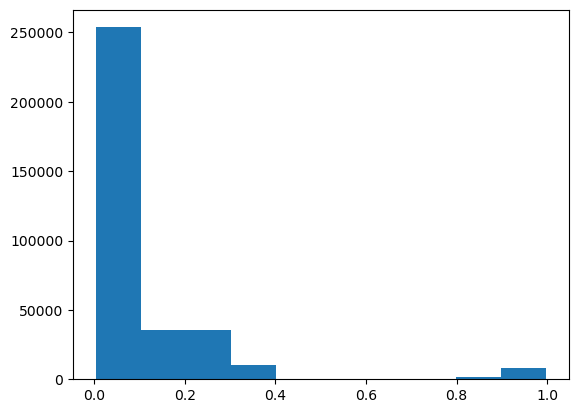

In [142]:
plt.hist(img.flatten())

In [147]:
min_depth = np.min(img)
max_depth = np.max(img)
inverted = max_depth + min_depth - img

In [148]:
inverted = np.clip(inverted, 0.81, 1.0)

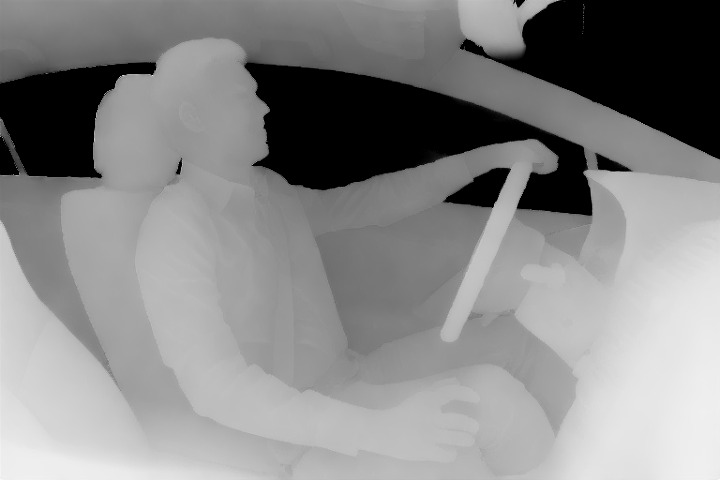

In [149]:
min_depth = np.min(inverted)
max_depth = np.max(inverted)
normalized = (inverted - min_depth) / (max_depth - min_depth)
normalized = (normalized * 255).astype(np.uint8)
normalized = Image.fromarray(normalized)
normalized

In [150]:
normalized.save('stuff/marigold_depth_bw.jpg')

Image saved to logs/marigold_depth.png


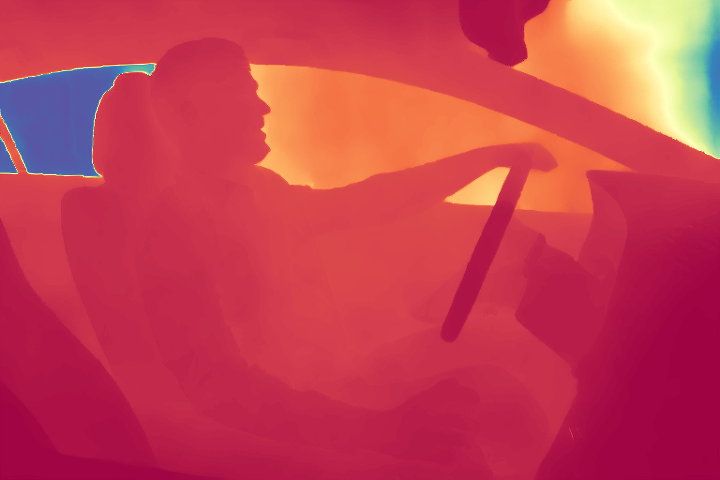

In [55]:
def depth_to_image(
    depth_array: np.ndarray, output_path: str | Path = 'logs/depth_image.png'
) -> Image.Image:
    # Normalize depth values to 0-255
    normalized = (depth_array - np.min(depth_array)) / (
        np.max(depth_array) - np.min(depth_array)
    )
    normalized = (normalized * 255).astype(np.uint8)

    # Apply a colormap for better visualization (optional)
    colormap = plt.cm.Spectral  # type: ignore
    color_mapped = colormap(normalized)
    color_mapped = (color_mapped[:, :, :3] * 255).astype(np.uint8)  # Convert to RGB

    # Save as an image
    image = Image.fromarray(color_mapped)
    image.save(output_path)
    print(f'Image saved to {output_path}')
    return image


# Example usage with dummy data
# dummy_depth = np.random.rand(100, 100)  # Replace with MarigoldDepthOutput
marigold_depth = depth_to_image(img, 'logs/marigold_depth.png')
marigold_depth
# plt.imshow(marigold_depth)

### MiDaS

In [112]:
MODEL = 'Intel/dpt-hybrid-midas'
pipe = pipeline(task='depth-estimation', model=MODEL, device=0)

In [113]:
image = Image.open(sample_img_path)
res = pipe(image)
depth = res['depth']

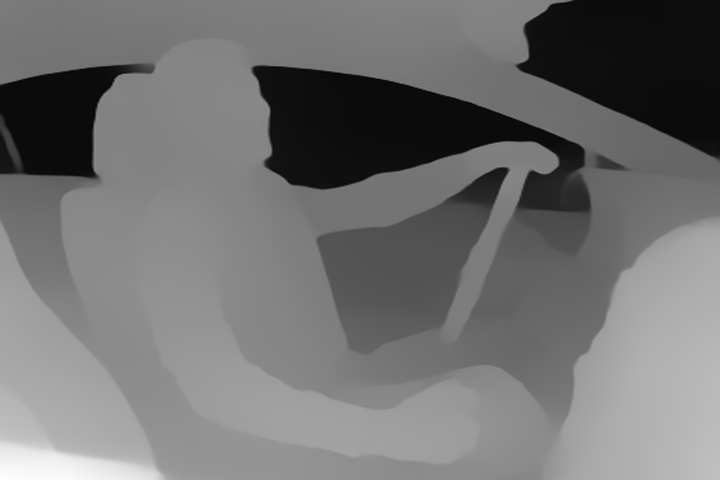

In [114]:
depth

In [115]:
depth.save('stuff/midas_depth_bw.jpg')

Image saved to logs/midas_dpt_depth.png


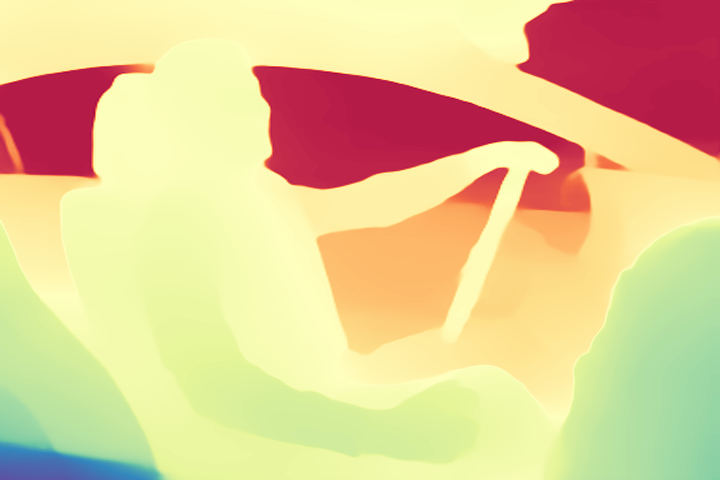

In [58]:
depth_to_image(res['predicted_depth'].numpy(), 'logs/midas_dpt_depth.png')

### Depth Anything 2 Small

In [116]:
MODEL = 'depth-anything/Depth-Anything-V2-Small-hf'
pipe = pipeline(task='depth-estimation', model=MODEL, device=0)

In [117]:
image = Image.open(sample_img_path)
res = pipe(image)
depth = res['depth']

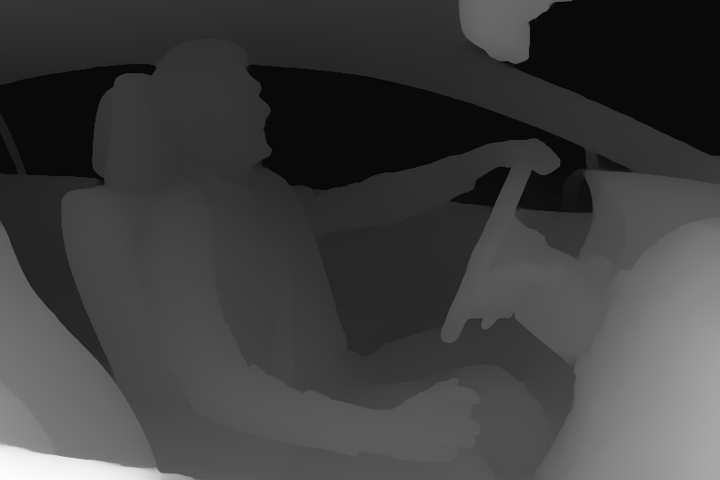

In [118]:
depth

In [119]:
depth.save('stuff/da2s_bw.jpg')

Image saved to logs/depth_anything_2_s_depth.png


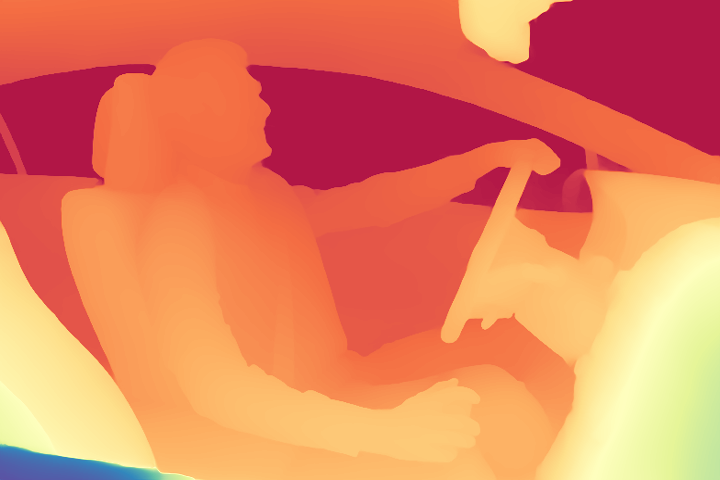

In [61]:
depth_to_image(res['predicted_depth'].numpy(), 'logs/depth_anything_2_s_depth.png')

### Depth Anything 2 Base

In [120]:
MODEL = 'depth-anything/Depth-Anything-V2-Base-hf'
pipe = pipeline(task='depth-estimation', model=MODEL, device=0)

In [121]:
image = Image.open(sample_img_path)
res = pipe(image)
depth = res['depth']

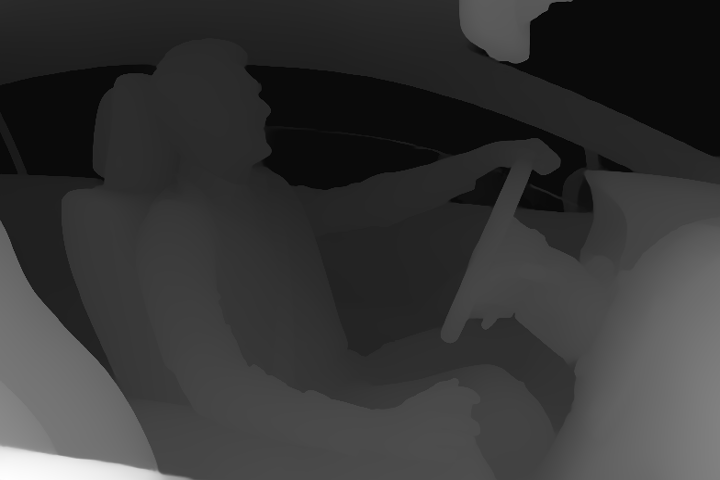

In [122]:
depth

In [123]:
depth.save('stuff/da2b_bw.jpg')

Image saved to logs/depth_anything_2_b_depth.png


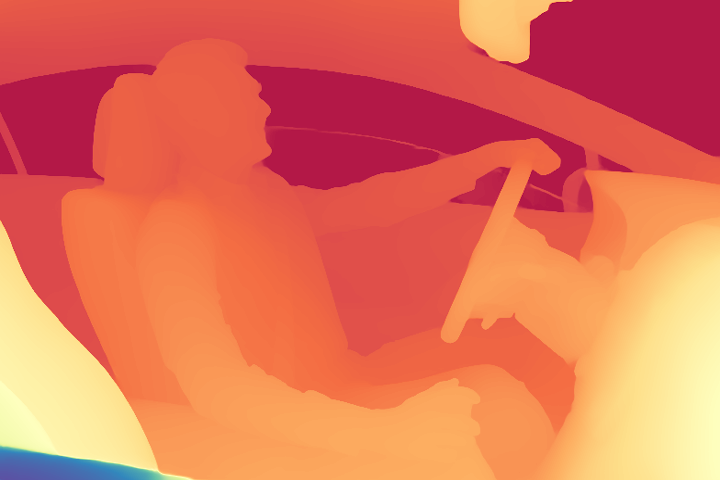

In [64]:
depth_to_image(res['predicted_depth'].numpy(), 'logs/depth_anything_2_b_depth.png')

### Depth Anything 2 Large

In [124]:
MODEL = 'depth-anything/Depth-Anything-V2-Large-hf'
pipe = pipeline(task='depth-estimation', model=MODEL, device=0)

In [125]:
image = Image.open(sample_img_path)
res = pipe(image)
depth = res['depth']

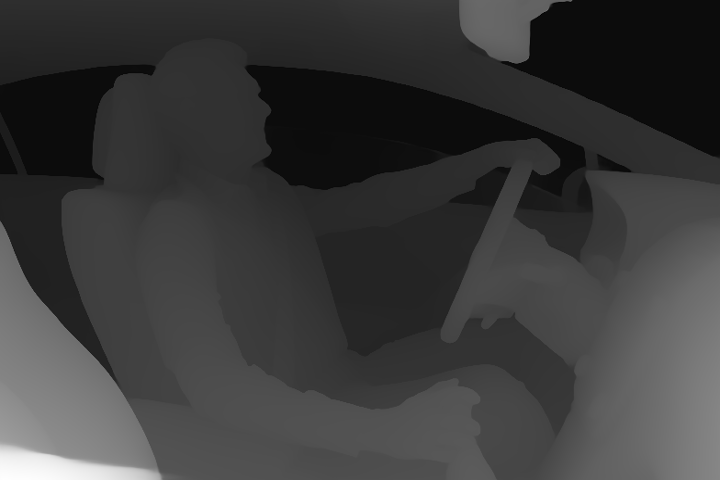

In [126]:
depth

In [127]:
depth.save('stuff/da2l_bw.jpg')

Image saved to logs/depth_anything_2_l_depth.png


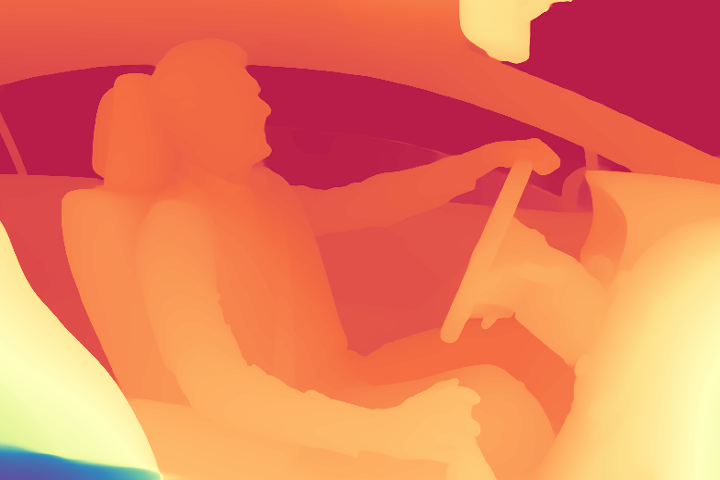

In [82]:
depth_to_image(res['predicted_depth'].numpy(), 'logs/depth_anything_2_l_depth.png')